### Import All Libraries
---

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
# import sklearn libraries

from sklearn.preprocessing import MinMaxScaler


## Load the dataset 


In [3]:
# load the data breast cancer wisconsin dataset
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

## print the shape of the data
print("The shape of the data is: ", data.shape)
print("The first 5 rows of the data are: ")
print(data.head())



The shape of the data is:  (699, 11)
The first 5 rows of the data are: 
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


## Preprocessing
---

In preprocessing we eill perform 
* Data Cleanup
    * missing values imputation 
* Scaling the data 
* renaming the class attributes in output


In [4]:

def cleanup_data(data):
    data.replace('?', np.nan, inplace=True)
    data.drop([0], axis=1, inplace=True)

    # replace 4 with 1 and 2 with 0
    data.iloc[:, -1] = data.iloc[:, -1].replace(4, 1)
    data.iloc[:, -1] = data.iloc[:, -1].replace(2, 0)
    return data


data = cleanup_data(data)

### Exploratory Data analysis
---

Describe the data: 
               1           2           3           4           5           7   \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.437768   
std      2.815741    3.051459    2.971913    2.855379    2.214300    2.438364   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    2.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    3.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               8           9           10  
count  699.000000  699.000000  699.000000  
mean     2.866953    1.589413    0.344778  
std      3.053634    1.715078    0.475636  
min      1.000000    1.000000    0.000000  
25%      1.000000    1.000000 

<ipython-input-5-f7197dc54793>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = newDf.corr()


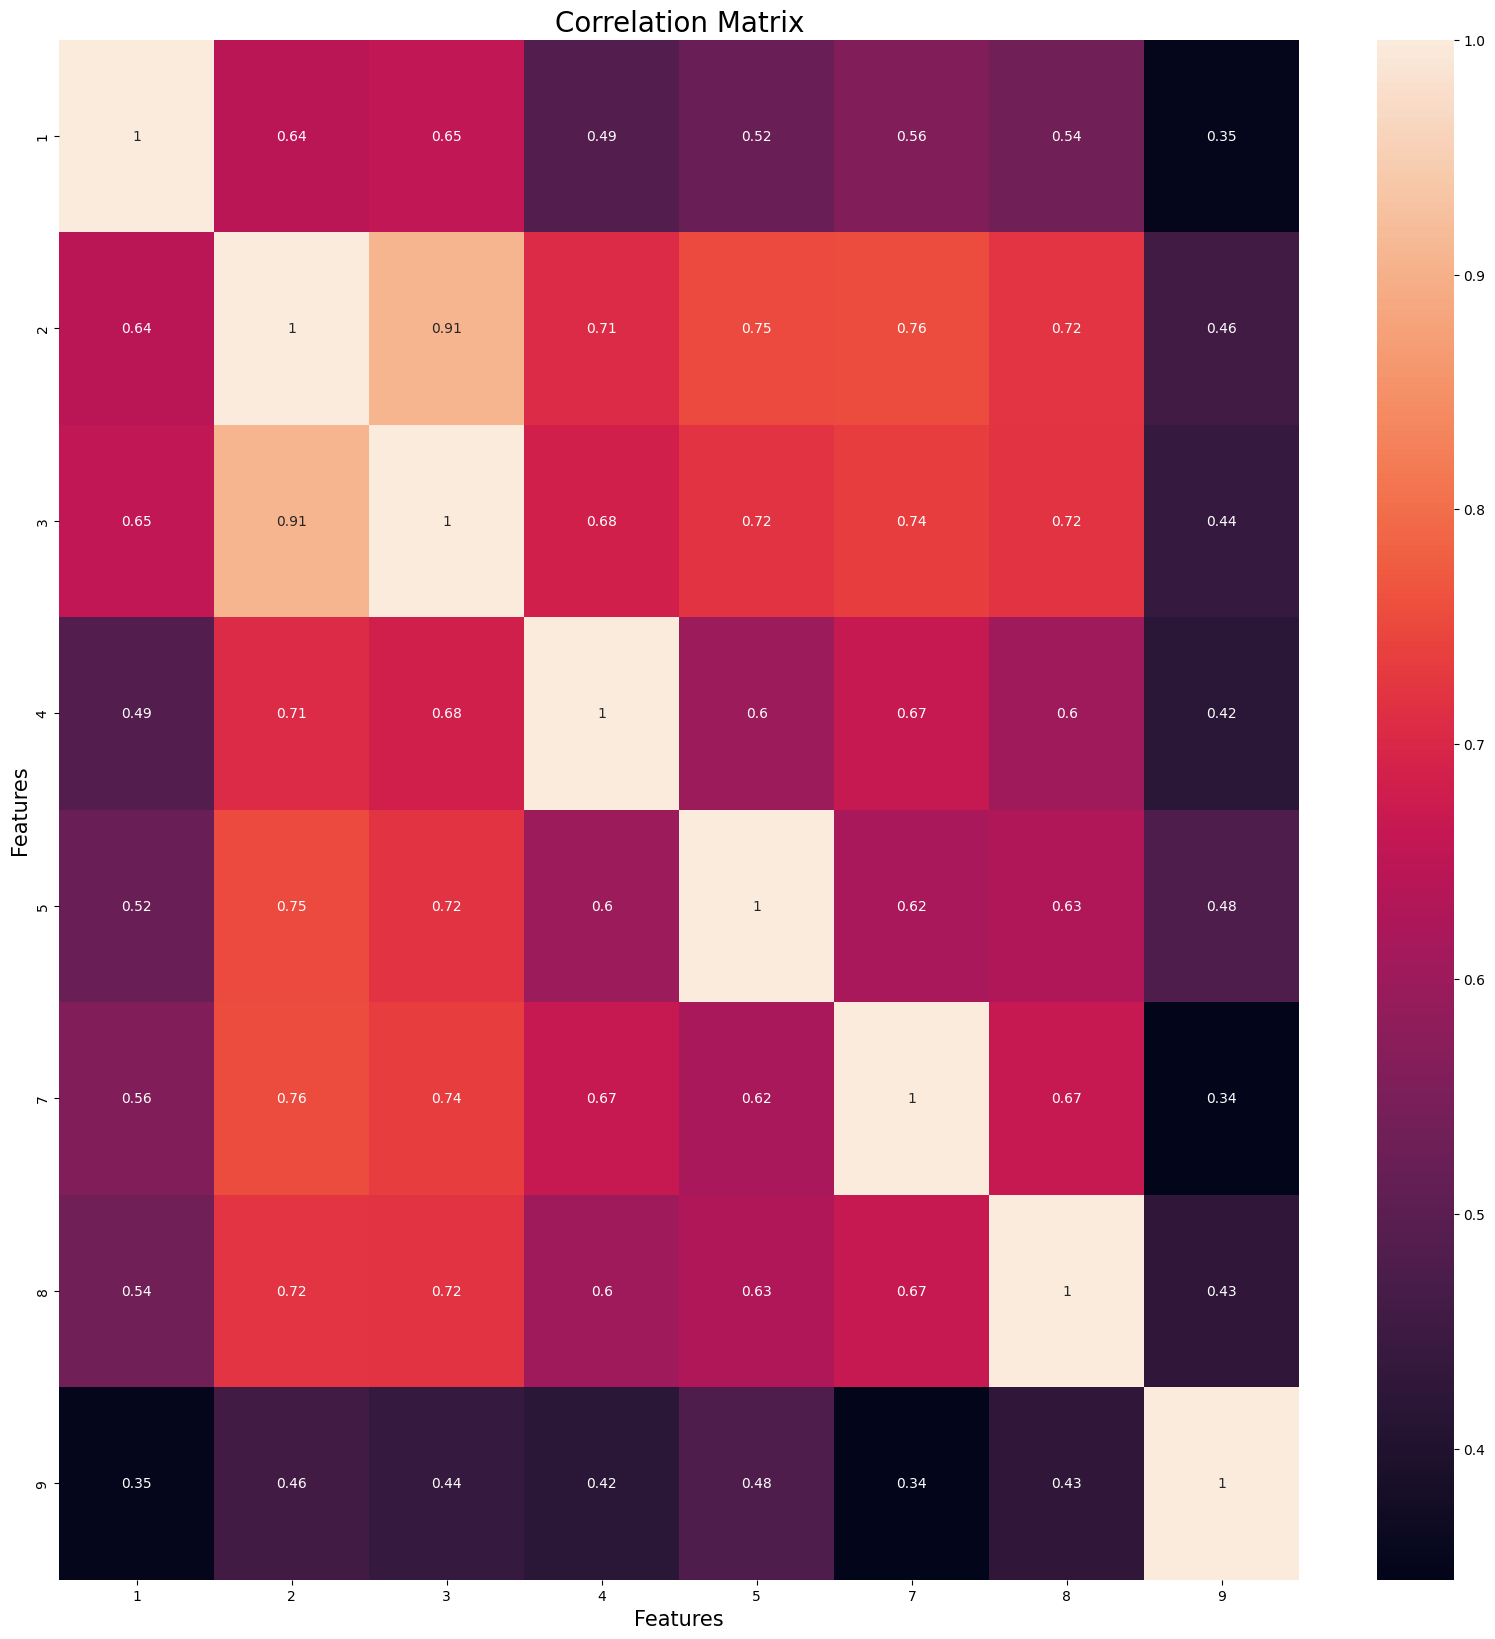

In [5]:

print("Describe the data: ")
print(data.describe())

# Plot corelation matrix
newDf = pd.DataFrame(data.iloc[:, :-1])
corrmat = newDf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
# plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True)
g.set_title("Correlation Matrix", fontsize=20)
g.set_xlabel("Features", fontsize=15)
g.set_ylabel("Features", fontsize=15)
plt.savefig("Correlation Matrix.png")
plt.show()


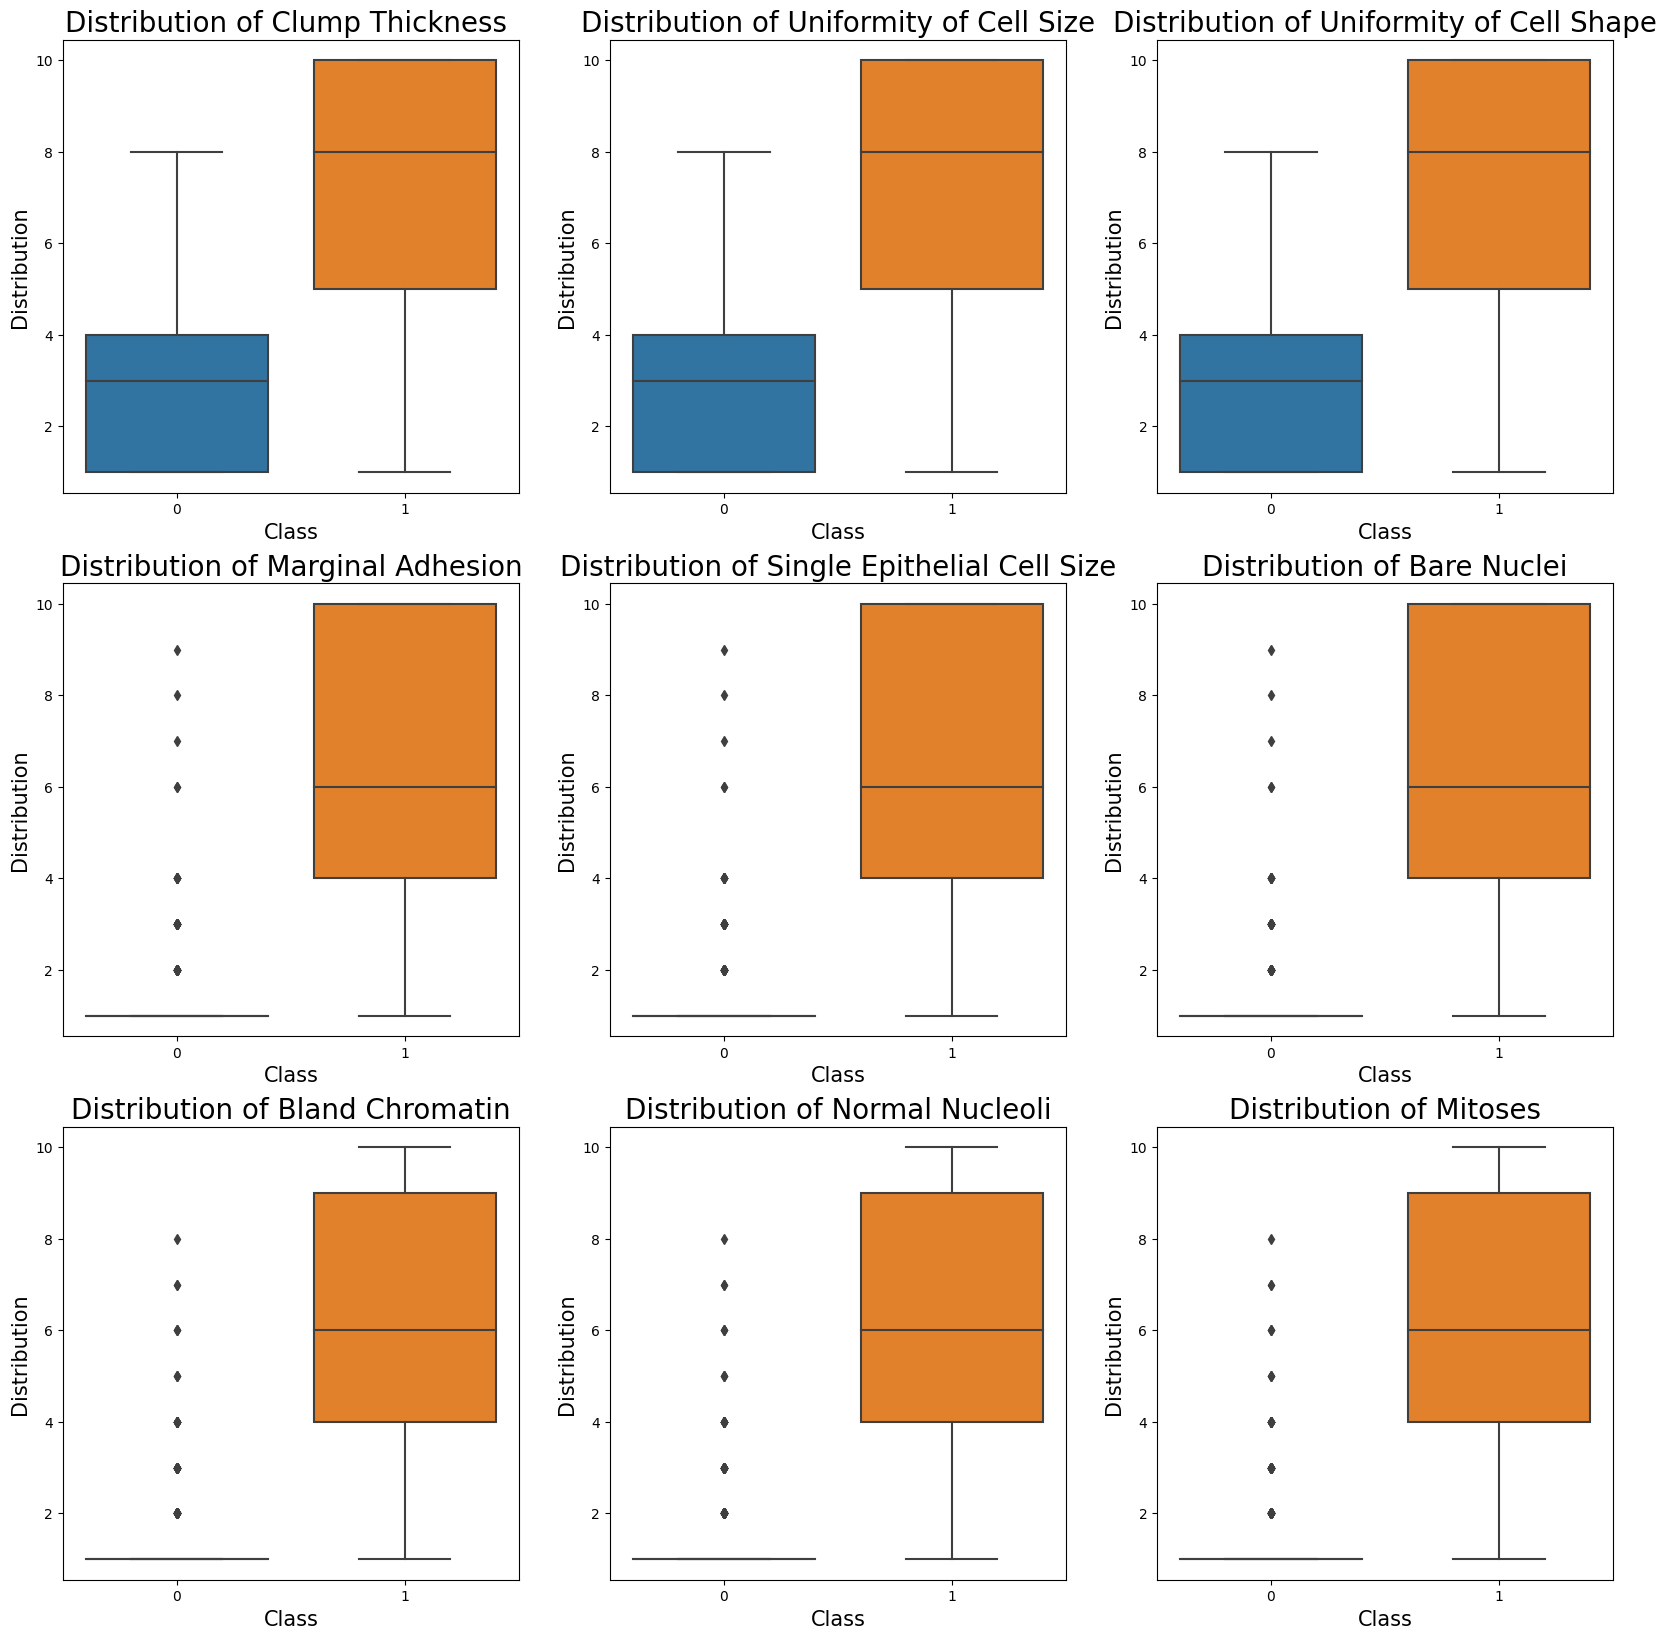

In [6]:

listVariables = ["Clump Thickness ", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
                 "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for k, name in enumerate(listVariables):
    i = k//3
    j = k % 3
    # Plot the distribution of the data in the class
    sns.boxplot(x=data.iloc[:, -1], y=data.iloc[:, i], ax=ax[i, j])
    ax[i, j].set_title(f"Distribution of {name}", fontsize=20)
    ax[i, j].set_xlabel("Class", fontsize=15)
    ax[i, j].set_ylabel("Distribution", fontsize=15)
plt.savefig("Violion Plots.png")
plt.show()

## Data Scaling and Cleaning pipeline
---

In [7]:
# Setup the data scaling and imputing pipelines


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# Split the data into train and test sets


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

# Apply transformations to the data

X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.transform(X_test)

## Build a NN model and plot loss functions
---

Epoch 1/35
18/18 [==============================] - 3s 46ms/step - loss: 0.7197 - accuracy: 0.5045 - val_loss: 0.5599 - val_accuracy: 0.9286
Epoch 2/35
18/18 [==============================] - 0s 7ms/step - loss: 0.5072 - accuracy: 0.9284 - val_loss: 0.4026 - val_accuracy: 0.9571
Epoch 3/35
18/18 [==============================] - 0s 7ms/step - loss: 0.3557 - accuracy: 0.9642 - val_loss: 0.2579 - val_accuracy: 0.9571
Epoch 4/35
18/18 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.9571 - val_loss: 0.1498 - val_accuracy: 0.9643
Epoch 5/35
18/18 [==============================] - 0s 7ms/step - loss: 0.1529 - accuracy: 0.9678 - val_loss: 0.1035 - val_accuracy: 0.9714
Epoch 6/35
18/18 [==============================] - 0s 6ms/step - loss: 0.1374 - accuracy: 0.9660 - val_loss: 0.0889 - val_accuracy: 0.9714
Epoch 7/35
18/18 [==============================] - 0s 7ms/step - loss: 0.1119 - accuracy: 0.9732 - val_loss: 0.0826 - val_accuracy: 0.9714
Epoch 8/35
18/18 [=

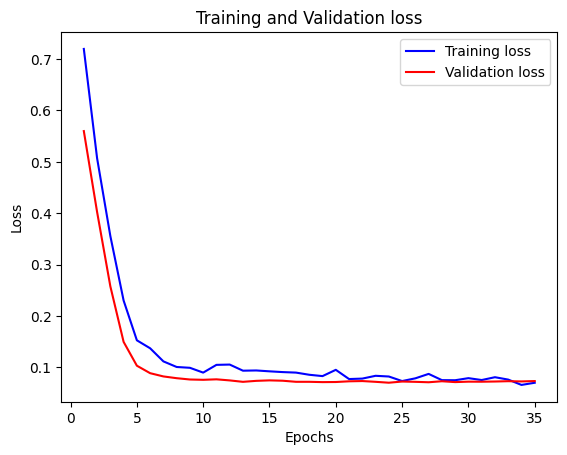

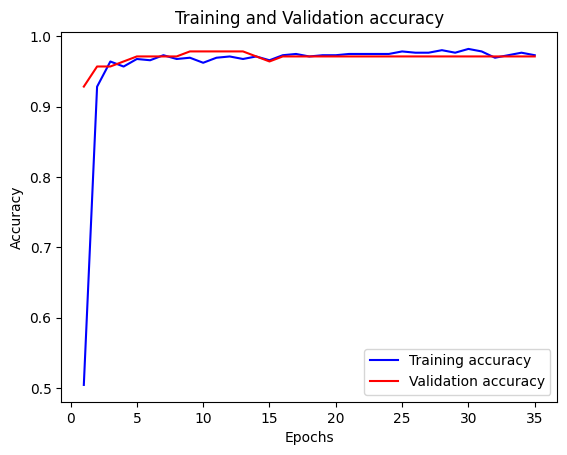

In [19]:
# build a Neural Network model using Keras Sequential API
model = Sequential()

# create a model with one input layer ine hidden layer and one output layer
model.add(Dense(9, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='sigmoid'))   # sigmoid for binary classification

# compile the model with learning rate as 0.001
opt = tf.optimizers.Adam(learning_rate=0.003)

model.compile(optimizer=opt, loss='binary_crossentropy',
                metrics=['accuracy'])


## call back for early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# fit the model
model.fit(x=X_train, y=y_train, epochs=35, validation_data=(
    X_test, y_test), verbose=1, callbacks=[early_stop])

## plot training and validation loss 
def lossPlotter(model):
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig("Training and Validation loss.png")
    plt.show()

    acc = model.history.history['accuracy']
    val_acc = model.history.history['val_accuracy']
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig("Training and Validation accuracy.png")
    plt.show()

lossPlotter(model)

In [20]:

print("The training accuracy is: ", model.history.history['accuracy'][-1]*100, "%")
print("The validation accuracy is: ", model.history.history['val_accuracy'][-1]*100, "%")


The training accuracy is:  97.31663465499878 %
The validation accuracy is:  97.14285731315613 %


## Print the model Summary
---


In [21]:

# print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 9)                 90        
                                                                 
 dense_16 (Dense)            (None, 15)                150       
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


## Print Final Statistics
---


5/5 [==============================] - 0s 3ms/step
[[86  4]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.93      1.00      0.96        50

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



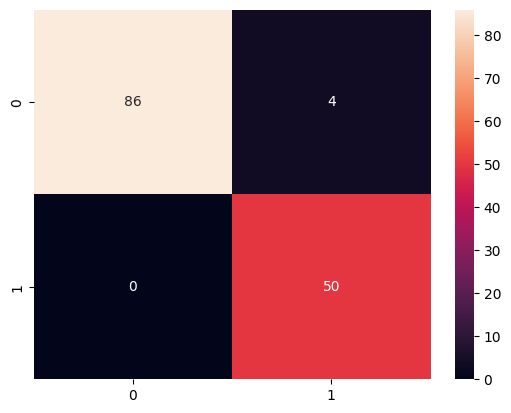

In [22]:

# print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# get the predicted class values from the model


predictions = model.predict(X_test)
result = np.where(predictions > 0.5, 1, 0)
print(confusion_matrix(y_test, result))

## print confusion matrix as a heatmap
ax = sns.heatmap(confusion_matrix(y_test, result), annot=True)
plt.savefig("Confusion Matrix.png")

print(classification_report(y_test, result))